Epoch: 0 Accuracy: 98.00%
Epoch: 1 Accuracy: 100.00%
Epoch: 2 Accuracy: 100.00%
Epoch: 3 Accuracy: 100.00%
Epoch: 4 Accuracy: 100.00%
Epoch: 5 Accuracy: 100.00%
Epoch: 6 Accuracy: 100.00%
Epoch: 7 Accuracy: 100.00%
Epoch: 8 Accuracy: 100.00%
Epoch: 9 Accuracy: 100.00%
Epoch: 10 Accuracy: 100.00%
Epoch: 11 Accuracy: 100.00%
Epoch: 12 Accuracy: 100.00%
Epoch: 13 Accuracy: 100.00%
Epoch: 14 Accuracy: 100.00%
Epoch: 15 Accuracy: 100.00%
Epoch: 16 Accuracy: 100.00%
Epoch: 17 Accuracy: 100.00%
Epoch: 18 Accuracy: 100.00%
Epoch: 19 Accuracy: 100.00%
Epoch: 20 Accuracy: 100.00%
Epoch: 21 Accuracy: 100.00%
Epoch: 22 Accuracy: 100.00%
Epoch: 23 Accuracy: 100.00%
Epoch: 24 Accuracy: 100.00%
Epoch: 25 Accuracy: 100.00%
Epoch: 26 Accuracy: 100.00%
Epoch: 27 Accuracy: 100.00%
Epoch: 28 Accuracy: 100.00%
Epoch: 29 Accuracy: 100.00%
Epoch: 30 Accuracy: 100.00%
Epoch: 31 Accuracy: 100.00%
Epoch: 32 Accuracy: 100.00%
Epoch: 33 Accuracy: 100.00%
Epoch: 34 Accuracy: 100.00%
Epoch: 35 Accuracy: 100.00%
Epo

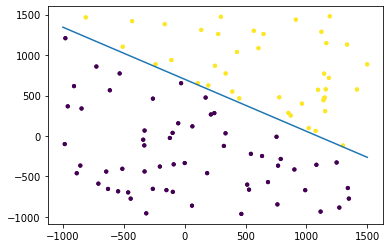

In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
import generator
import math

batch_size = 100
gen = generator.gen(batch_size)
epochs = 100
x1, x2, yp = [], [], []  # for plotting

class perceptron:
    def __call__(self, x):  # predicting function
        return tf.reduce_sum(x * self.Weight, axis=-1) + self.Bias

    def __init__(self):
        self.Weight = tf.Variable(0.0, shape=tf.TensorShape(None))  # initialize m to any shape
        self.Bias = tf.Variable(0.0)

    def acc(self, y, pred):
        signs = tf.math.sign(y*pred)
        positiveCount = tf.where(signs > 0.0).shape[0]
        return positiveCount/signs.shape[0]*100

    def train(self, x, y, epoch_count):
        global x1, x2, yp
        for i in range(x.shape[0]):
            x1 += [x[i].numpy()[0]]
            x2 += [x[i].numpy()[1]]
            yp += [y[i]]
            pred = self(x)
            if (y[i] * pred[i]) <= 0:
                error = y[i] - pred[i]
                self.Weight.assign_add(x[i] * y[i])
                self.Bias.assign_add(y[i] + error)
        accuracy = self.acc(y, pred)
        print(f'Epoch: {epoch_count} Accuracy: {accuracy:.2f}%')

model = perceptron()
x, y = next(gen)
model.Weight.assign([0.0] * x.shape[-1])
for epoch_count in range(epochs):
    model.train(x, y, epoch_count)

print(f'Weight: {model.Weight.numpy()}, Bias: {model.Bias.numpy()}')

plt.plot([-1000, 1500], [(-model.Weight[0]/model.Weight[1]) * -1000 + (-model.Bias/model.Weight[1]), (-model.Weight[0]/model.Weight[1]) * 1500 + (-model.Bias/model.Weight[1])])
plt.scatter(x1[:200], x2[:200], c=yp[:200], s=10)  # Plot some points only
# plt.xlim([-1000, 1500])
# plt.ylim([-1000, 1500])
plt.show()

Epoch: 0 Accuracy: 0.00%
Epoch: 1 Accuracy: 0.00%
Epoch: 2 Accuracy: 0.00%
Epoch: 3 Accuracy: 0.00%
Epoch: 4 Accuracy: 0.00%
Epoch: 5 Accuracy: 0.00%
Epoch: 6 Accuracy: 0.00%
Epoch: 7 Accuracy: 0.00%
Epoch: 8 Accuracy: 0.00%
Epoch: 9 Accuracy: 0.00%
Epoch: 10 Accuracy: 0.00%
Epoch: 11 Accuracy: 0.00%
Epoch: 12 Accuracy: 0.00%
Epoch: 13 Accuracy: 0.00%
Epoch: 14 Accuracy: 0.00%
Epoch: 15 Accuracy: 0.00%
Epoch: 16 Accuracy: 0.00%
Epoch: 17 Accuracy: 0.00%
Epoch: 18 Accuracy: 0.00%
Epoch: 19 Accuracy: 0.00%
Epoch: 20 Accuracy: 0.00%
Epoch: 21 Accuracy: 0.00%
Epoch: 22 Accuracy: 0.00%
Epoch: 23 Accuracy: 0.00%
Epoch: 24 Accuracy: 0.00%
Epoch: 25 Accuracy: 0.00%
Epoch: 26 Accuracy: 0.00%
Epoch: 27 Accuracy: 0.00%
Epoch: 28 Accuracy: 0.00%
Epoch: 29 Accuracy: 0.00%
Epoch: 30 Accuracy: 0.00%
Epoch: 31 Accuracy: 0.00%
Epoch: 32 Accuracy: 0.00%
Epoch: 33 Accuracy: 0.00%
Epoch: 34 Accuracy: 0.00%
Epoch: 35 Accuracy: 0.00%
Epoch: 36 Accuracy: 0.00%
Epoch: 37 Accuracy: 0.00%
Epoch: 38 Accuracy: 0.

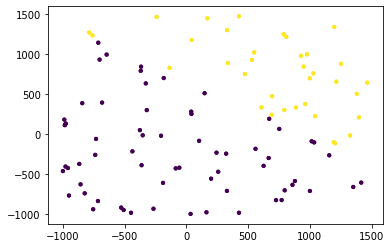

In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
import generator
import math

batch_size = 100
gen = generator.gen(batch_size)
epochs = 100
regTerm = 1e-3
lr = 1e-5
x1, x2, yp = [], [], []  # for plotting

class LinearClassifier:
    def __call__(self, x):  # predicting function
        return tf.reduce_sum(x * self.Weight, axis=-1) + self.Bias

    def __init__(self):
        self.Weight = tf.Variable(0.0, shape=tf.TensorShape(None))  # initialize m to any shape
        self.Bias = tf.Variable(0.0)

    def acc(self, y, pred):
        signs = tf.math.sign(y*pred)
        positiveCount = tf.where(signs > 0.0).shape[0]
        return positiveCount/signs.shape[0]*100

    def loss(self, y, pred):
        return tf.reduce_mean(tf.math.maximum(0, 1-y*pred) + regTerm * tf.norm(self.Weight, ord='euclidean'))  # tf.reduce_mean(max(0, 1-y*pred) + regTerm * tf.sqrt(self.Weight[0] ** 2 + self.Weight[1] ** 2) ** 2)

    def train(self, x, y, epoch_count, lr):
        global x1, x2, yp
        for i in range(x.shape[0]):
            x1 += [x[i].numpy()[0]]
            x2 += [x[i].numpy()[1]]
            yp += [y[i]]
            with tf.GradientTape(persistent=False) as t:
                t.watch(self.Bias)# persistent=True is needed if assigning dy_dWeight, dy_dBias in 2 lines. Limits the times u can call it to once
                pred = self(x)
                current_loss = self.loss(y[i], pred[i])
            dy_dWeight, dy_dBias = t.gradient(current_loss, [self.Weight, self.Bias])
            self.Weight.assign_sub(lr * dy_dWeight)
            self.Bias.assign_sub(lr * dy_dBias)
        accuracy = self.acc(y, pred)
        print(f'Epoch: {epoch_count} Accuracy: {accuracy:.2f}%')

model = LinearClassifier()
x, y = next(gen)
model.Weight.assign([0.0] * x.shape[-1])
for epoch_count in range(epochs):
    model.train(x, y, epoch_count, lr)

print(f'Weight: {model.Weight.numpy()}, Bias: {model.Bias.numpy()}')

plt.plot([-1000, 1500], [(-model.Weight[0]/model.Weight[1]) * -1000 + (-model.Bias/model.Weight[1]), (-model.Weight[0]/model.Weight[1]) * 1500 + (-model.Bias/model.Weight[1])])
plt.scatter(x1[:200], x2[:200], c=yp[:200], s=10)  # Plot some points only
# plt.xlim([-1000, 1500])
# plt.ylim([-1000, 1500])
plt.show()